In [1]:
import numpy as np
import matplotlib.pyplot as plt

Задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_logloss(y, y_pred):
    for i in range(len(y_pred)):
        if y_pred[i] <= 0:
            y_pred[i] = 1e-15
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [4]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

Задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.   

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [68]:
def eval_model(X, y, iterations=1000, alpha=1e-4):
    logloss = []
    iter_num = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
        logloss.append(err)
        iter_num.append(i)
    return W, logloss, iter_num

In [62]:
def plot_logloss(iterations, alpha):
    plt.title('Log loss')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.plot(eval_model(X_st, y, iterations, alpha)[-1],eval_model(X_st, y, iterations, alpha)[1])

500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489
1500 [ 0.44089887 -0.31020268  0.64391187  1.44036779] 0.9565773724088873
2000 [ 0.4236874  -0.36359967  0.6425439   1.41506965] 0.8807599507543653
2500 [ 0.40735199 -0.41357856  0.6414242   1.39140696] 0.8141924355796999
3000 [ 0.39201058 -0.45900098  0.64080604  1.36974771] 0.758759980653503
3500 [ 0.37774317 -0.49894982  0.64090828  1.35037357] 0.7151777920985423
4000 [ 0.36455825 -0.53307004  0.64184068  1.33337513] 0.682537501076679
4500 [ 0.35239197 -0.56162274  0.6435874   1.31863951] 0.6587997057955899
5000 [ 0.34113653 -0.58526221  0.64604926  1.30592474] 0.6416846622934699
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489
1500 [ 0.44089887 -0.31020268  0.64391187  1.44036779] 0.9565773724088873
2000 [ 0.4236874  -0.36359967  0.6425439   1

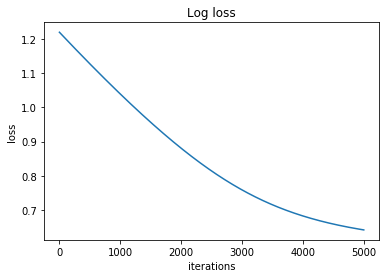

In [63]:
plot_logloss(5000, 1e-4)

800 [ 0.28674785 -0.66226082  0.66947011  1.25790601] 0.6000844770958681
1600 [ 0.1879499  -0.6953201   0.74498575  1.21841972] 0.575624870144612
2400 [ 0.11204861 -0.68987785  0.81056775  1.21120728] 0.5628776455640999
3200 [ 0.04751324 -0.68530277  0.86380541  1.21448096] 0.554055817305571
4000 [-0.00868429 -0.68420414  0.90686656  1.22453943] 0.5476418419000334
4800 [-0.05839486 -0.68589164  0.94188188  1.2396968 ] 0.5427171930373041
5600 [-0.10304842 -0.68961201  0.97056077  1.25869155] 0.5387209037824571
6400 [-0.14376698 -0.69478544  0.994234    1.28052452] 0.5353140657629132
7200 [-0.18142396 -0.70097827  1.01393023  1.3044127 ] 0.532292591990865
8000 [-0.21669501 -0.70786663  1.0304431   1.32974977] 0.5295332269569839
800 [ 0.28674785 -0.66226082  0.66947011  1.25790601] 0.6000844770958681
1600 [ 0.1879499  -0.6953201   0.74498575  1.21841972] 0.575624870144612
2400 [ 0.11204861 -0.68987785  0.81056775  1.21120728] 0.5628776455640999
3200 [ 0.04751324 -0.68530277  0.86380541  1

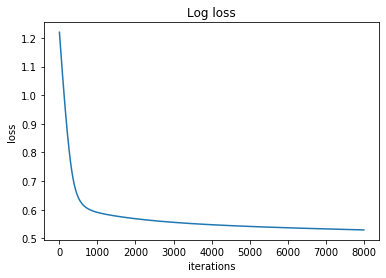

In [64]:
plot_logloss(8000, 1e-3)

100 [ 0.25769171 -0.68297243  0.68841418  1.2405903 ] 0.5908596023453087
200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099054
300 [ 0.06257746 -0.68605867  0.85181735  1.21283095] 0.5560473747533587
400 [-0.00887935 -0.68415387  0.90713736  1.22443854] 0.5476800278385013
500 [-0.0701621  -0.68661758  0.94984062  1.24404686] 0.5416765996151559
600 [-0.1239972  -0.69202069  0.98318257  1.26924759] 0.5369841864977791
700 [-0.17239277 -0.69933957  1.00953865  1.29824779] 0.5330427663756572
800 [-0.21681092 -0.7078635   1.03062761  1.32973537] 0.5295551503580799
900 [-0.25830834 -0.71709934  1.04769231  1.36276535] 0.5263621224044184
1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747
100 [ 0.25769171 -0.68297243  0.68841418  1.2405903 ] 0.5908596023453087
200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099054
300 [ 0.06257746 -0.68605867  0.85181735  1.21283095] 0.5560473747533587
400 [-0.00887935 -0.68415387  0.90713736  1.224438

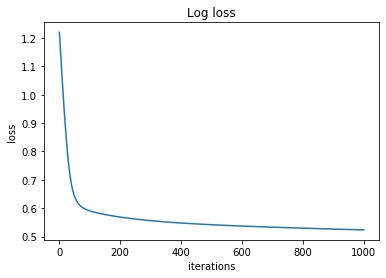

In [65]:
plot_logloss(1000, 1e-2)

Задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [73]:
def calc_pred_proba(W, X):
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X)))
    return y_pred_proba

In [75]:
calc_pred_proba(eval_model(X_st, y, 1000, 1e-3)[0], X_st)

100 [ 0.4588585  -0.2544203   0.6453169   1.46694374] 1.0410271098401283
200 [ 0.42366472 -0.36366056  0.64254667  1.41503365] 0.8819616824356442
300 [ 0.39197407 -0.45912506  0.6408019   1.36968388] 0.7595098840306068
400 [ 0.36451116 -0.53324936  0.64182901  1.3332885 ] 0.6828881509068778
500 [ 0.34108547 -0.58545911  0.64603577  1.3058302 ] 0.6418288972649147
600 [ 0.32083524 -0.62105749  0.65259781  1.28534741] 0.6201376264698928
700 [ 0.30292451 -0.64542451  0.66061271  1.26984863] 0.6078121821371582
800 [ 0.28674785 -0.66226082  0.66947011  1.25790601] 0.6000844770958681
900 [ 0.27188803 -0.67393645  0.67879458  1.24855638] 0.5947360850543498
1000 [ 0.25805314 -0.68199349  0.68835345  1.24114037] 0.5906912249945011


array([0.53566335, 0.60511251, 0.74210529, 0.57073604, 0.79716314,
       0.77743239, 0.78864716, 0.2004661 , 0.51797143, 0.80405546])

Задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [103]:
def calc_pred(W, X):
    y_predict = sigmoid(np.dot(W, X))
    y_pred = []
    for i in range(len(y_predict)):
        if (y_predict[i-1] > 0.5): 
            y_pred.append(1)
        elif (y_predict[i-1] <= 0.5):
            y_pred.append(0)
    return y_pred

In [104]:
calc_pred(eval_model(X_st, y, 1000, 1e-3)[0], X_st)

100 [ 0.4588585  -0.2544203   0.6453169   1.46694374] 1.0410271098401283
200 [ 0.42366472 -0.36366056  0.64254667  1.41503365] 0.8819616824356442
300 [ 0.39197407 -0.45912506  0.6408019   1.36968388] 0.7595098840306068
400 [ 0.36451116 -0.53324936  0.64182901  1.3332885 ] 0.6828881509068778
500 [ 0.34108547 -0.58545911  0.64603577  1.3058302 ] 0.6418288972649147
600 [ 0.32083524 -0.62105749  0.65259781  1.28534741] 0.6201376264698928
700 [ 0.30292451 -0.64542451  0.66061271  1.26984863] 0.6078121821371582
800 [ 0.28674785 -0.66226082  0.66947011  1.25790601] 0.6000844770958681
900 [ 0.27188803 -0.67393645  0.67879458  1.24855638] 0.5947360850543498
1000 [ 0.25805314 -0.68199349  0.68835345  1.24114037] 0.5906912249945011


[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]

Задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score. 

Задание 6: Могла ли модель переобучиться? Почему?

 Задание 7 (опциональное): Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.